In [ ]:
import tensorflow as tf

**Data Preprocessing**

Dataset: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression?resource=download

In [ ]:
import pandas as pd
df = pd.read_csv("/content/train.csv")
x = df.count(axis=0)
print(x)
df.dropna(axis=0,inplace=True)

v.id             1000
on road old      1000
on road now      1000
years            1000
km               1000
rating           1000
condition        1000
economy          1000
top speed        1000
hp               1000
torque           1000
current price    1000
dtype: int64


**Data Description**

In [ ]:
df.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


**Data Pattern**

In [ ]:
#import seaborn as sns
#sns.pairplot(df.iloc[:,1:])

**DataFrame to Tensors**

In [ ]:
#Input Data
data = tf.constant(df, dtype=tf.float32)
X = data[:,3:-1]
#Target Variable
y = data[:,-1]
y = tf.expand_dims(y, axis=1)
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[351318. ],
       [285001.5],
       [215386. ],
       [244295.5],
       [531114.5]], dtype=float32)>

In [ ]:
#ignore this is for verifying inner workings

import math
mean = tf.reduce_mean(X[:,0])
var= tf.reduce_sum( tf.pow(X[:,0]-mean,2) )/1000
a = (X[0,0]-mean)/ math.sqrt(var)
print(f"{mean}\n{math.sqrt(var)}\n{a}")
pd.DataFrame(X[:,0]).describe()

4.560999870300293
1.71821981402262
-0.9084984064102173


,0
count,1000.000000
mean,4.561000
std,1.719079
min,2.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,7.000000


In [ ]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer,Dropout
normalizer = Normalization()
normalizer.adapt(X)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_22 (Normaliza  (None, 8)                17        
 tion)                                                           
                                                                 
 dense_118 (Dense)           (None, 128)               1152      
                                                                 
 dense_119 (Dense)           (None, 128)               16512     
                                                                 
 dense_120 (Dense)           (None, 128)               16512     
                                                                 
 dense_121 (Dense)           (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
________________________________________________

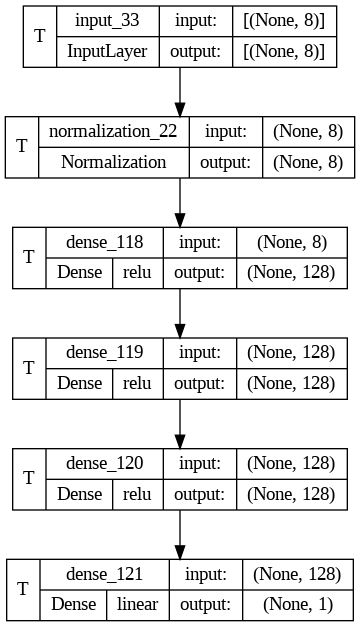

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

model = tf.keras.models.Sequential(
  [
      InputLayer(input_shape=(X.shape[1],))
  ]
)
model.add(normalizer)
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.summary()
tf.keras.utils.plot_model(model, show_shapes= True, show_layer_activations=True, show_trainable=True)

In [ ]:
from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import SGD, Adam
model.compile(
    loss='mean_absolute_error',
    optimizer=Adam(0.001),
    metrics=RootMeanSquaredError()
)

In [ ]:
X_train, y_train = X[:900,:], y[:900,:]
X_test, y_test = X[901:, :], y[901:,:]


print(X_train.shape,y_train.shape)
history = model.fit(X_train,y_train, verbose =1, epochs=1000)

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 14ms/step - loss: 38956.2266 - root_mean_squared_error: 48356.4297 - mean_absolute_error: 0.0000e+00


[38956.2265625, 48356.4296875, 0.0, 0.0]

In [ ]:
predicted = []
for i in range(99):
  x = tf.squeeze(model.predict(tf.expand_dims(X_test[i], axis= 0)))
  predicted.append(x)

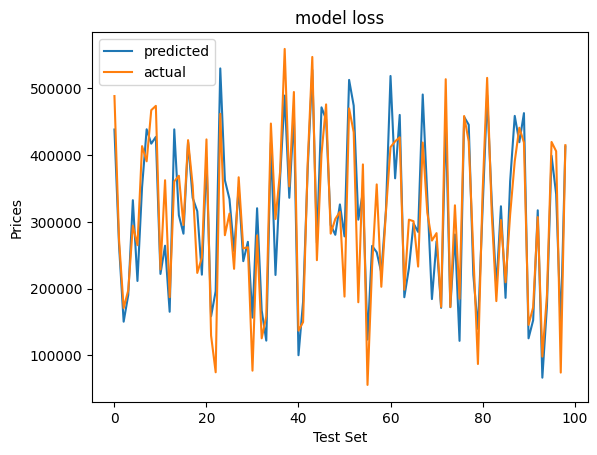

In [ ]:
from matplotlib import pyplot as plt
plt.plot(predicted)
plt.plot(y_test)
plt.title('model loss')
plt.ylabel('Prices')
plt.xlabel('Test Set')
plt.legend(['predicted','actual'])
plt.show()